### Working With State Vector 

In [78]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np 
from numpy import linalg
from IPython.display import display as disp , Math, Latex

In [79]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

disp(u,v,w)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))
Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))


In [80]:
disp(u.draw('text'))
disp(u.draw('latex'))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

In [81]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

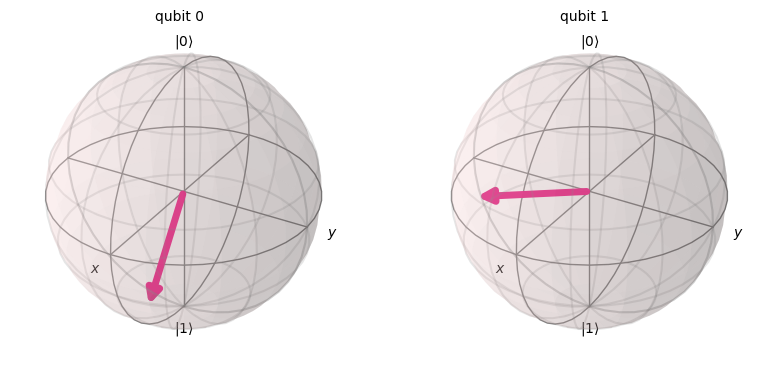

In [82]:
# State vector in normalized form
a = np.array([1,4,-3j, 1-4j])
a/= linalg.norm(a)
u = Statevector(a)
plot_bloch_multivector(u)

In [83]:
v = Statevector([(1+2.j)/3, -2/3])
print("Before Mesurement Statevector V :")
disp(v.draw('latex'))

prob_0 = linalg.norm(np.array(v)[0])**2
prob_1 = linalg.norm(np.array(v)[1])**2
 
print(f"Probablity to collaps on 0 : {prob_0} ")
print(f"Probablity to collaps on 1 : {prob_1} ")
print(2*"\n")
qubit_basis, v_prime = v.measure()

print(f"Measure respect to  '{qubit_basis}' and V' is : ")

disp(v_prime.draw('latex'))



Before Mesurement Statevector V :


<IPython.core.display.Latex object>

Probablity to collaps on 0 : 0.5555555555555556 
Probablity to collaps on 1 : 0.4444444444444444 



Measure respect to  '0' and V' is : 


<IPython.core.display.Latex object>

{'0': 540, '1': 460}

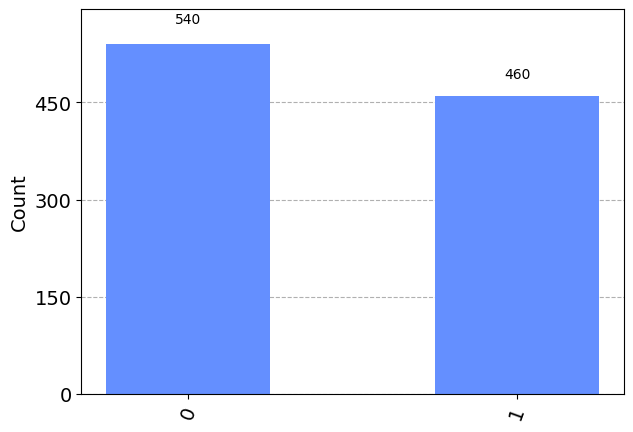

In [84]:
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

$|u\rangle$

In [24]:
help(Latex)

Help on class Latex in module IPython.core.display:

class Latex(TextDisplayObject)
 |  Latex(data=None, url=None, filename=None, metadata=None)
 |  
 |  Method resolution order:
 |      Latex
 |      TextDisplayObject
 |      DisplayObject
 |      builtins.object
 |  
 |  Methods inherited from DisplayObject:
 |  
 |  __init__(self, data=None, url=None, filename=None, metadata=None)
 |      Create a display object given raw data.
 |      
 |      When this object is returned by an expression or passed to the
 |      display function, it will result in the data being displayed
 |      in the frontend. The MIME type of the data should match the
 |      subclasses used, so the Png subclass should be used for 'image/png'
 |      data. If the data is a URL, the data will first be downloaded
 |      and then displayed. If
 |      
 |      Parameters
 |      ----------
 |      data : unicode, str or bytes
 |          The raw data or a URL or file to load the data from
 |      url : unicode
 